# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NY-Queens  (Clustering)

In [1]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Import the data as Pandas DataFrame as follows
df = pd.read_csv("df_queens_zip_law.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FELONY       57 non-null     int64  
 1   MISDEMEANOR  57 non-null     int64  
 2   VIOLATION    57 non-null     int64  
 3   Crime        57 non-null     int64  
 4   zip          57 non-null     int64  
 5   latitude     57 non-null     float64
 6   longitude    57 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 3.2 KB


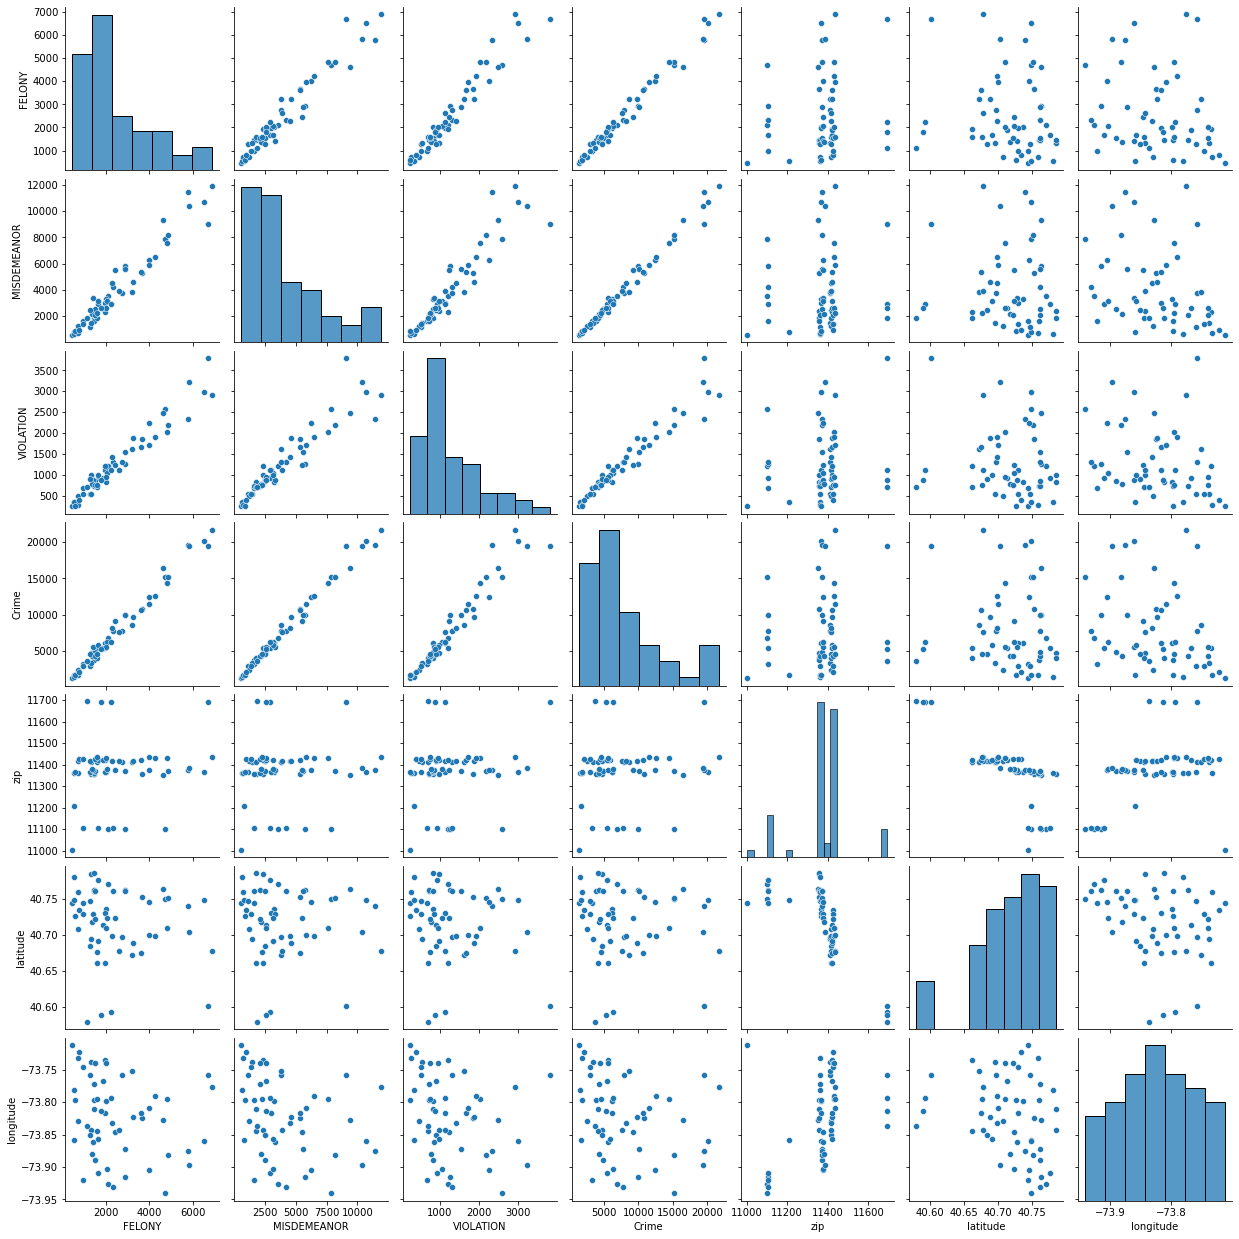

In [4]:
sns.pairplot(df)

## 1. K-Means

- Drop zip code column

In [5]:
df2 = df.copy()
df2.drop('zip', axis=1, inplace=True)
df2.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude
0,473,588,252,1313,40.744585,-73.712026
1,4698,7885,2572,15155,40.749188,-73.940684
2,2099,3569,1210,6878,40.771185,-73.926525
3,2909,5790,1252,9951,40.762818,-73.914699
4,967,1632,679,3278,40.744165,-73.920746


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(df2)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled) for k in range(2, 7)]
inertias = [model.inertia_ for model in kmeans_per_k]

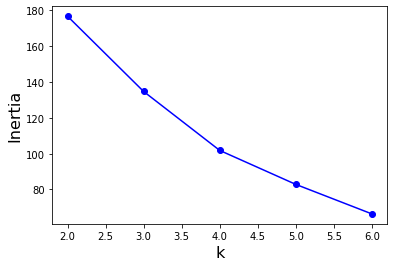

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), inertias, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Inertia", fontsize=16)
plt.show()

In [8]:
# Computation of silhouette sores
silhouette_scores = [silhouette_score(X_scaled, model.labels_) for model in kmeans_per_k]

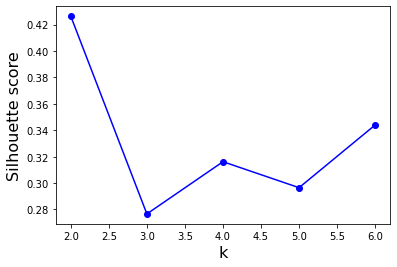

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Silhouette score", fontsize=16)
plt.show()

## 4-Cluster result

In [10]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [11]:
# Scatter plot of 4-cluster result
# X_scaled: scaled X variables
# yr: cluster labels
# column name of X variables
# x: x-label to plot
# y: y-label to plot
def plot_4c(X_s, yr, cols, x, y):
    nx = cols.index(x)
    ny = cols.index(y)
    plt.scatter(X_s[:,nx][yr==3], X_s[:,ny][yr==3],
             marker='s', c = 'c', s = 50, alpha = 0.6)
    plt.scatter(X_s[:,nx][yr==2], X_s[:,ny][yr==2],
              marker='^', c = 'g', s = 70, alpha = 0.6)
    plt.scatter(X_s[:,nx][yr==1], X_s[:,ny][yr==1],
              marker='+', c = 'm', s = 90, alpha = 0.6)
    plt.scatter(X_s[:,nx][yr==0], X_s[:,ny][yr==0],
              marker='D', c = 'r', s = 50, alpha = 0.6)
    plt.xlabel(x,fontsize=14)
    plt.ylabel(y,fontsize=14)
    plt.legend(["C3","C2","C1","C0"],fontsize=14)

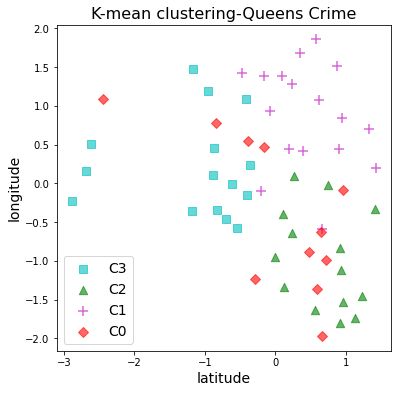

In [12]:
cols = list(df2)
plt.figure(figsize=(6,6))
plot_4c(X_scaled, kmeans_4.labels_, cols, 'latitude', 'longitude')
plt.title('K-mean clustering-Queens Crime', fontsize = 16)
plt.show()

### Cluster center

In [13]:
cols = list(df2)
kmeans_center_df = pd.DataFrame(kmeans_4.cluster_centers_, columns=cols)
kmeans_center_df

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude
0,1.726992,1.728099,1.689671,1.741453,-0.007870,-0.388911
1,-0.803438,-0.847255,-0.873999,-0.847140,0.451116,0.875918
2,-0.272902,-0.119052,-0.182400,-0.177906,0.679177,-0.978418
3,-0.101189,-0.195935,-0.078320,-0.150928,-1.139392,0.205684


In [14]:
table1 = df2.describe()
table1[:3]

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2499.105263,3996.789474,1261.052632,7756.947368,40.717434,-73.822957
std,1667.425322,2934.586797,801.917288,5343.735720,0.048103,0.060276


### Scaled cluster center

In [15]:
# Scaled cluster center
kmeans_center_scale_df = kmeans_center_df.copy()
for i in cols:
    kmeans_center_scale_df[i] = kmeans_center_scale_df[i]*table1[i][2]+table1[i][1]
    
kmeans_center_scale_df = kmeans_center_scale_df.astype({"FELONY":int, "MISDEMEANOR": int, "VIOLATION":int, "Crime": int})
kmeans_center_scale_df["cluster"] = kmeans_center_scale_df.index
kmeans_center_scale_df

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude,cluster
0,5378,9068,2616,17062,40.717055,-73.846399,0
1,1159,1510,560,3230,40.739134,-73.770161,1
2,2044,3647,1114,6806,40.750105,-73.881932,2
3,2330,3421,1198,6950,40.662625,-73.810560,3


### Scaled cluster center/mean value

In [16]:
# Scaled cluster center (normalized by mean)
table1 = df2.describe()
cols = list(df2)
kmeans_center_ratio_df = kmeans_center_scale_df.copy()
for i in cols:
    kmeans_center_ratio_df[i] = (kmeans_center_df[i]*table1[i][2]+table1[i][1])/table1[i][1]

kmeans_center_ratio_df["cluster"] = kmeans_center_scale_df.index
kmeans_center_ratio_df

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude,cluster
0,2.152264,2.268832,2.074481,2.199681,0.999991,1.000318,0
1,0.463939,0.377915,0.444214,0.416408,1.000533,0.999285,1
2,0.817918,0.912588,0.884010,0.877441,1.000802,1.000799,2
3,0.932486,0.856137,0.950196,0.896026,0.998654,0.999832,3


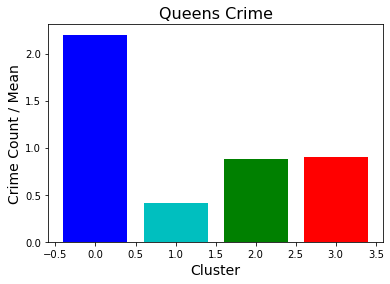

In [17]:
plt.figure(figsize=(6,4))
plt.bar(kmeans_center_ratio_df['cluster'],kmeans_center_ratio_df['Crime'],color=['b','c', 'g','r','y'])
plt.xlabel("Cluster",fontsize=14)
plt.ylabel("Crime Count / Mean",fontsize=14)
#plt.grid()
plt.title('Queens Crime', fontsize = 16)
plt.show()

## Append 4-cluster result to the dataframe

In [18]:
label = kmeans_4.labels_
df["K_mean"] = label
df.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
0,473,588,252,1313,11004,40.744585,-73.712026,1
1,4698,7885,2572,15155,11101,40.749188,-73.940684,0
2,2099,3569,1210,6878,11102,40.771185,-73.926525,2
3,2909,5790,1252,9951,11103,40.762818,-73.914699,2
4,967,1632,679,3278,11104,40.744165,-73.920746,2


In [19]:
# Write to a csv file
df.to_csv("df_queens_k4.csv", index = False)

## Append 4 cluster result to df_bronx.csv

In [20]:
# Make zip to cluster conversion dictionary
queens_zip_cluster4 = []
for i in range(len(df)):
    queens_zip_cluster4.append([df['zip'].iloc[i], df['K_mean'].iloc[i]])
queens_zip_cluster4_dict = dict(queens_zip_cluster4)

df_b = pd.read_csv("df_queens.csv")
df_b['cluster'] = df_b['Zip'].apply(lambda x: queens_zip_cluster4_dict[x])

# Write to a csv file
df_b.to_csv("df_queens_c4.csv", index = False)

### Cluster-Zip code

In [24]:
df_select = df[['zip','K_mean']]
cluster_zip_list = [] 
for cluster in range(4):
    cluster_zip_list.append(
        (cluster, list(df_select[df['K_mean']==cluster]['zip'])))
cluster_zip_dict =  dict(cluster_zip_list)

In [25]:
for cluster in range(4):
    print(cluster, cluster_zip_dict[cluster])

0 [11101, 11354, 11368, 11372, 11373, 11377, 11385, 11432, 11433, 11434, 11691]
1 [11004, 11207, 11357, 11358, 11360, 11361, 11362, 11364, 11365, 11366, 11411, 11415, 11423, 11426, 11427, 11428, 11429]
2 [11102, 11103, 11104, 11105, 11106, 11355, 11356, 11367, 11369, 11370, 11374, 11375, 11378, 11379]
3 [11412, 11413, 11414, 11416, 11417, 11418, 11419, 11420, 11421, 11422, 11435, 11436, 11692, 11693, 11694]


In [26]:
pd.DataFrame(cluster_zip_dict.items(),
            columns=['Cluster','Zip Code'])

,Cluster,Zip Code
0,0,"[11101, 11354, 11368, 11372, 11373, 11377, 113..."
1,1,"[11004, 11207, 11357, 11358, 11360, 11361, 113..."
2,2,"[11102, 11103, 11104, 11105, 11106, 11355, 113..."
3,3,"[11412, 11413, 11414, 11416, 11417, 11418, 114..."
